In [6]:
dataPath = 'ЛПП мышей/h/'

In [7]:
import scipy.io
import scipy.signal
import os
import numpy as np
from matplotlib import pyplot as plt  
from scipy.fft import fft, fftfreq, irfft, ifft, rfft, rfftfreq
from scipy.ndimage import gaussian_filter
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse import linalg
from numpy.linalg import norm
import shutil

In [8]:
def removeArts(signal):
    s = signal.copy()
    mean = np.mean(s)
    normS = normalization(s, True)
    for i in range(5200, 5350):
        if abs(normS[i])>0.7:
            s[i] = s[i-150]
    normS = normalization(s, True)
    for i in range(0, 5200):
        if abs(normS[i])>5:
            s[i] = mean
    for i in range(6000, len(s)):
        if abs(normS[i])>5:
            s[i] = mean
    normS = normalization(s, True)
    for i in range(0, 5200):
        if abs(normS[i])>5:
            s[i] = mean
    for i in range(6000, len(s)):
        if abs(normS[i])>5:
            s[i] = mean
    normS = normalization(s, True)
    for i in range(5200, 5350):
        if abs(normS[i])>0.5:
            s[i] = s[i-150]
    return s
def normalization(s, needStd = False):
    if needStd:
        return np.array((s-s.mean())/s.std())
    else:
        return np.array(s-s.mean())

In [9]:
folders = os.listdir(path=dataPath)
filenames = [dataPath+folder+'/'+filename for folder in folders for filename in os.listdir(path=dataPath+folder)]

In [10]:
records = [scipy.io.loadmat(filename) for filename in filenames]
traces1 = [record[[*record.keys()][-3]] for record in records]
traces2 = [record[[*record.keys()][-2]] for record in records]
traces3 = [record[[*record.keys()][-1]] for record in records]

In [11]:
h100 = []
h200 = []
h300 = []
h400 = []
h500 = []
h1000 = []
for i in range(len(filenames)):
    if ' h 100 ' in filenames[i] or ' h 100.' in filenames[i] or ' healthy 100 ' in filenames[i] or ' healthy 100.' in filenames[i]:
        h100.append(filenames[i])
    if ' h 200 ' in filenames[i] or ' h 200.' in filenames[i] or ' healthy 200 ' in filenames[i] or ' healthy 200.' in filenames[i]:
        h200.append(filenames[i])
    if ' h 300 ' in filenames[i] or ' h 300.' in filenames[i] or ' healthy 300 ' in filenames[i] or ' healthy 300.' in filenames[i]:
        h300.append(filenames[i])
    if ' h 400 ' in filenames[i] or ' h 400.' in filenames[i] or ' healthy 400 ' in filenames[i] or ' healthy 400.' in filenames[i]:
        h400.append(filenames[i])
    if ' h 500 ' in filenames[i] or ' h 500.' in filenames[i] or ' healthy 500 ' in filenames[i] or ' healthy 500.' in filenames[i]:
        h500.append(filenames[i])
    if ' h 1000 ' in filenames[i] or ' h 1000.' in filenames[i] or ' healthy 1000 ' in filenames[i] or ' healthy 1000.' in filenames[i]:
        h1000.append(filenames[i])

In [12]:
records100 = [scipy.io.loadmat(filename) for filename in h100]
records200 = [scipy.io.loadmat(filename) for filename in h200]
records300 = [scipy.io.loadmat(filename) for filename in h300]
records400 = [scipy.io.loadmat(filename) for filename in h400]
records500 = [scipy.io.loadmat(filename) for filename in h500]
records1000 = [scipy.io.loadmat(filename) for filename in h1000]

In [13]:
ca1100 = []
for rec in records100:
    for k in rec.keys():
        if str(k).endswith('_2'):
            ca1100.append(rec[str(k)][:,1])
ca1100 = np.array(ca1100)
ca3100 = []
for rec in records100:
    for k in rec.keys():
        if str(k).endswith('_3'):
            ca3100.append(rec[str(k)][:,1])
ca3100 = np.array(ca3100)

maxlen = len(ca1100[0])
        
wa1100 = np.array([removeArts(rec) for rec in ca1100])
wa3100 = np.array([removeArts(rec) for rec in ca3100])

normca1100 = np.array([normalization(rec) for rec in wa1100])
normca3100 = np.array([normalization(rec) for rec in wa3100])

meanLine1100 = sum(wa1100)/len(wa1100)
normMeanLine1100 = sum(normca1100)/len(normca1100)

meanLine3100 = sum(wa3100)/len(wa3100)
normMeanLine3100 = sum(normca3100)/len(normca3100)

ca1200 = []
for rec in records200:
    for k in rec.keys():
        if str(k).endswith('_2'):
            ca1200.append(rec[str(k)][:,1])
ca1200 = np.array(ca1200)
ca3200 = []
for rec in records200:
    for k in rec.keys():
        if str(k).endswith('_3'):
            ca3200.append(rec[str(k)][:,1])
ca3200 = np.array(ca3200)

maxlen = len(ca1200[0])
        
wa1200 = np.array([removeArts(rec) for rec in ca1200])
wa3200 = np.array([removeArts(rec) for rec in ca3200])
normca1200 = np.array([normalization(rec) for rec in wa1200])
normca3200 = np.array([normalization(rec) for rec in wa3200])

meanLine1200 = sum(wa1200)/len(wa1200)
normMeanLine1200 = sum(normca1200)/len(normca1200)

meanLine3200 = sum(wa3200)/len(wa3200)
normMeanLine3200 = sum(normca3200)/len(normca3200)

ca1300 = []
for rec in records300:
    for k in rec.keys():
        if str(k).endswith('_2'):
            ca1300.append(rec[str(k)][:,1])
ca1300 = np.array(ca1300)
ca3300 = []
for rec in records300:
    for k in rec.keys():
        if str(k).endswith('_3'):
            ca3300.append(rec[str(k)][:,1])
ca3300 = np.array(ca3300)

maxlen = len(ca1300[0])
        
wa1300 = np.array([removeArts(rec) for rec in ca1300])
wa3300 = np.array([removeArts(rec) for rec in ca3300])
normca1300 = np.array([normalization(rec) for rec in wa1300])
normca3300 = np.array([normalization(rec) for rec in wa3300])

meanLine1300 = sum(wa1300)/len(wa1300)
normMeanLine1300 = sum(normca1300)/len(normca1300)

meanLine3300 = sum(wa3300)/len(wa3300)
normMeanLine3300 = sum(normca3300)/len(normca3300)

ca1400 = []
for rec in records400:
    for k in rec.keys():
        if str(k).endswith('_2'):
            ca1400.append(rec[str(k)][:,1])
ca1400 = np.array(ca1400)
ca3400 = []
for rec in records400:
    for k in rec.keys():
        if str(k).endswith('_3'):
            ca3400.append(rec[str(k)][:,1])
ca3400 = np.array(ca3400)

maxlen = len(ca1400[0])
        
wa1400 = np.array([removeArts(rec) for rec in ca1400])
wa3400 = np.array([removeArts(rec) for rec in ca3400])
normca1400 = np.array([normalization(rec) for rec in wa1400])
normca3400 = np.array([normalization(rec) for rec in wa3400])

meanLine1400 = sum(wa1400)/len(wa1400)
normMeanLine1400 = sum(normca1400)/len(normca1400)

meanLine3400 = sum(wa3400)/len(wa3400)
normMeanLine3400 = sum(normca3400)/len(normca3400)

ca1500 = []
for rec in records500:
    for k in rec.keys():
        if str(k).endswith('_2'):
            ca1500.append(rec[str(k)][:,1])
ca1500 = np.array(ca1500)
ca3500 = []
for rec in records500:
    for k in rec.keys():
        if str(k).endswith('_3'):
            ca3500.append(rec[str(k)][:,1])
ca3500 = np.array(ca3500)

maxlen = len(ca1500[0])
        
wa1500 = np.array([removeArts(rec) for rec in ca1500])
wa3500 = np.array([removeArts(rec) for rec in ca3500])
normca1500 = np.array([normalization(rec) for rec in wa1500])
normca3500 = np.array([normalization(rec) for rec in wa3500])

meanLine1500 = sum(wa1500)/len(wa1500)
normMeanLine1500 = sum(normca1500)/len(normca1500)

meanLine3500 = sum(wa3500)/len(wa3500)
normMeanLine3500 = sum(normca3500)/len(normca3500)

ca11000 = []
for rec in records1000:
    for k in rec.keys():
        if str(k).endswith('_2'):
            ca11000.append(rec[str(k)][:,1])
ca11000 = np.array(ca11000)
ca31000 = []
for rec in records1000:
    for k in rec.keys():
        if str(k).endswith('_3'):
            ca31000.append(rec[str(k)][:,1])
ca31000 = np.array(ca31000)

maxlen = len(ca11000[0])
        
wa11000 = np.array([removeArts(rec) for rec in ca11000])
wa31000 = np.array([removeArts(rec) for rec in ca31000])
normca11000 = np.array([normalization(rec) for rec in wa11000])
normca31000 = np.array([normalization(rec) for rec in wa31000])

meanLine11000 = sum(wa11000)/len(wa11000)
normMeanLine11000 = sum(normca11000)/len(normca11000)

meanLine31000 = sum(wa31000)/len(wa31000)
normMeanLine31000 = sum(normca31000)/len(normca31000)

In [14]:
n_freq = 48
freq = np.fft.rfft(normMeanLine1100)
r = np.abs(freq)
a = np.angle(freq)
r[n_freq:] = 0
filt_freq = r * np.exp(1j*a)
filtered1 = np.fft.irfft(filt_freq) 

n_freq = 75
freq = np.fft.rfft(normMeanLine1100)
r = np.abs(freq)
a = np.angle(freq)
r[n_freq:] = 0
filt_freq = r * np.exp(1j*a)
filtered2 = np.fft.irfft(filt_freq) 

b, a = scipy.signal.butter(3, 0.01)
filtered3 = scipy.signal.filtfilt(b, a, normMeanLine1100, method="gust")

windowSize = 200
window = np.hanning(windowSize)
window = window / window.sum()
filteredSignal = np.convolve(window, normMeanLine1100, mode='valid')
filtered5 = [np.mean(filteredSignal) for s in normMeanLine1100]
startIndex = int(windowSize/2)
for i in range(startIndex, startIndex+len(filteredSignal)):
    filtered5[i]=filteredSignal[i-startIndex]
    
filtered6 = gaussian_filter(normMeanLine1100, 35)

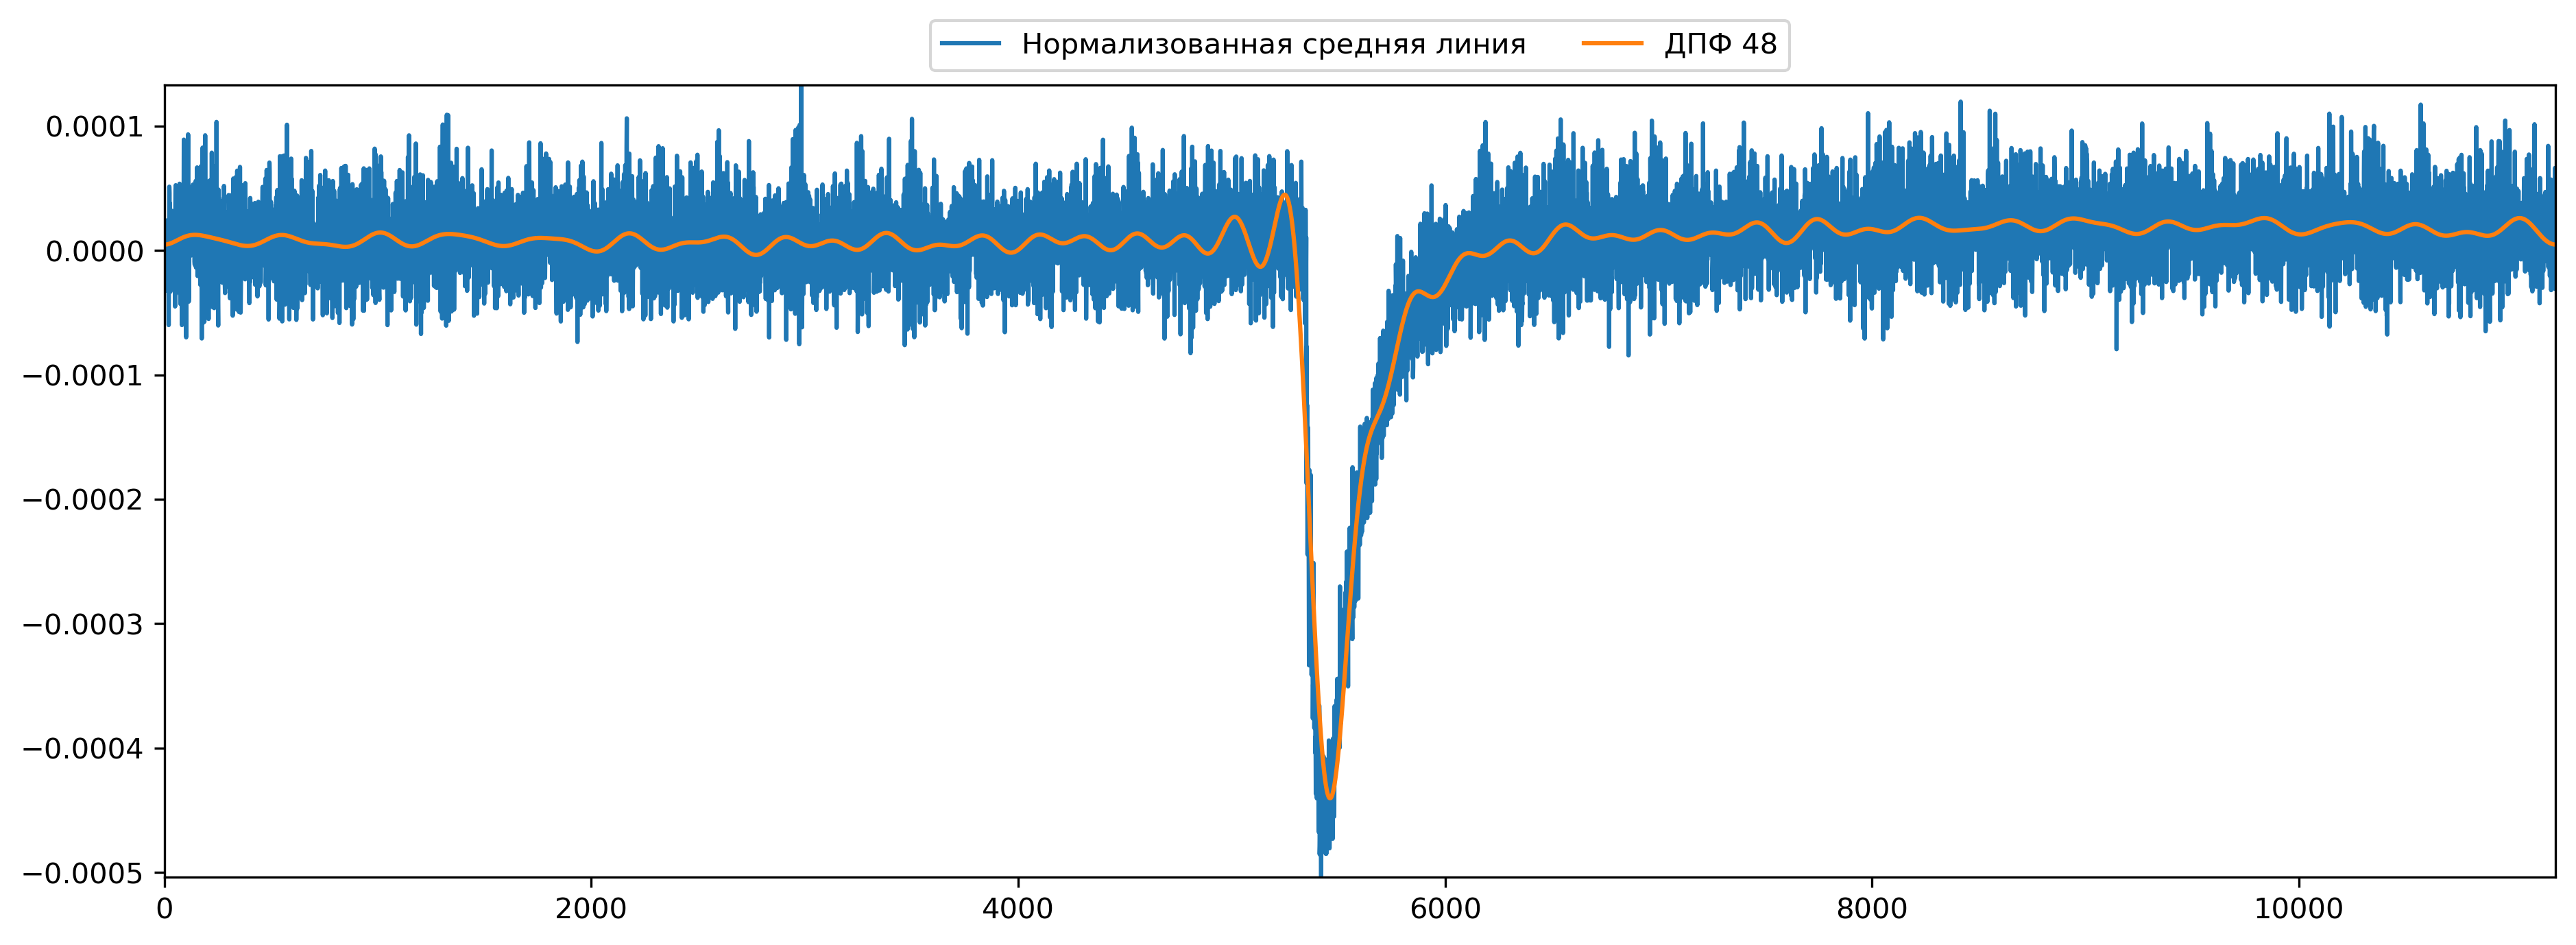

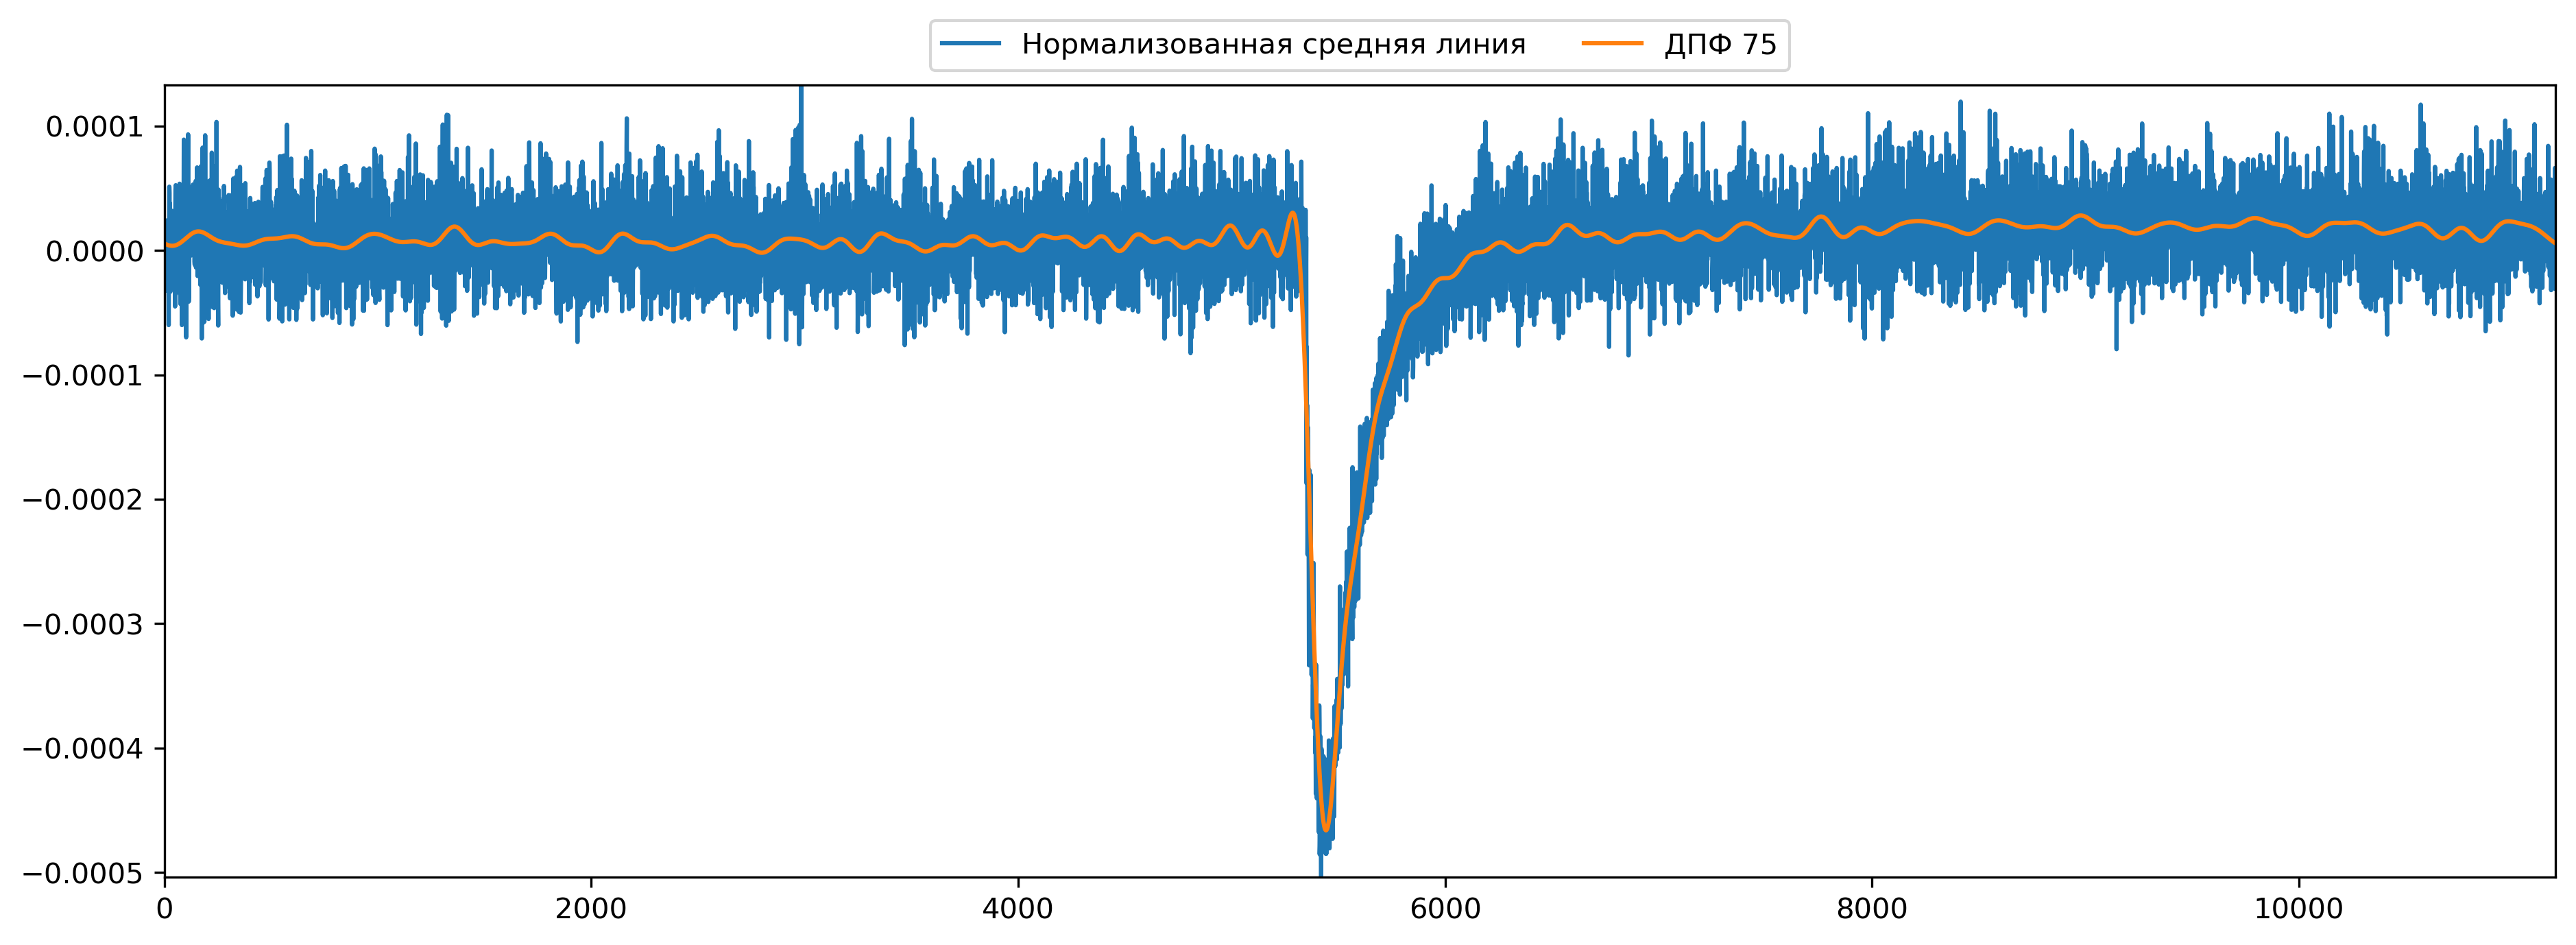

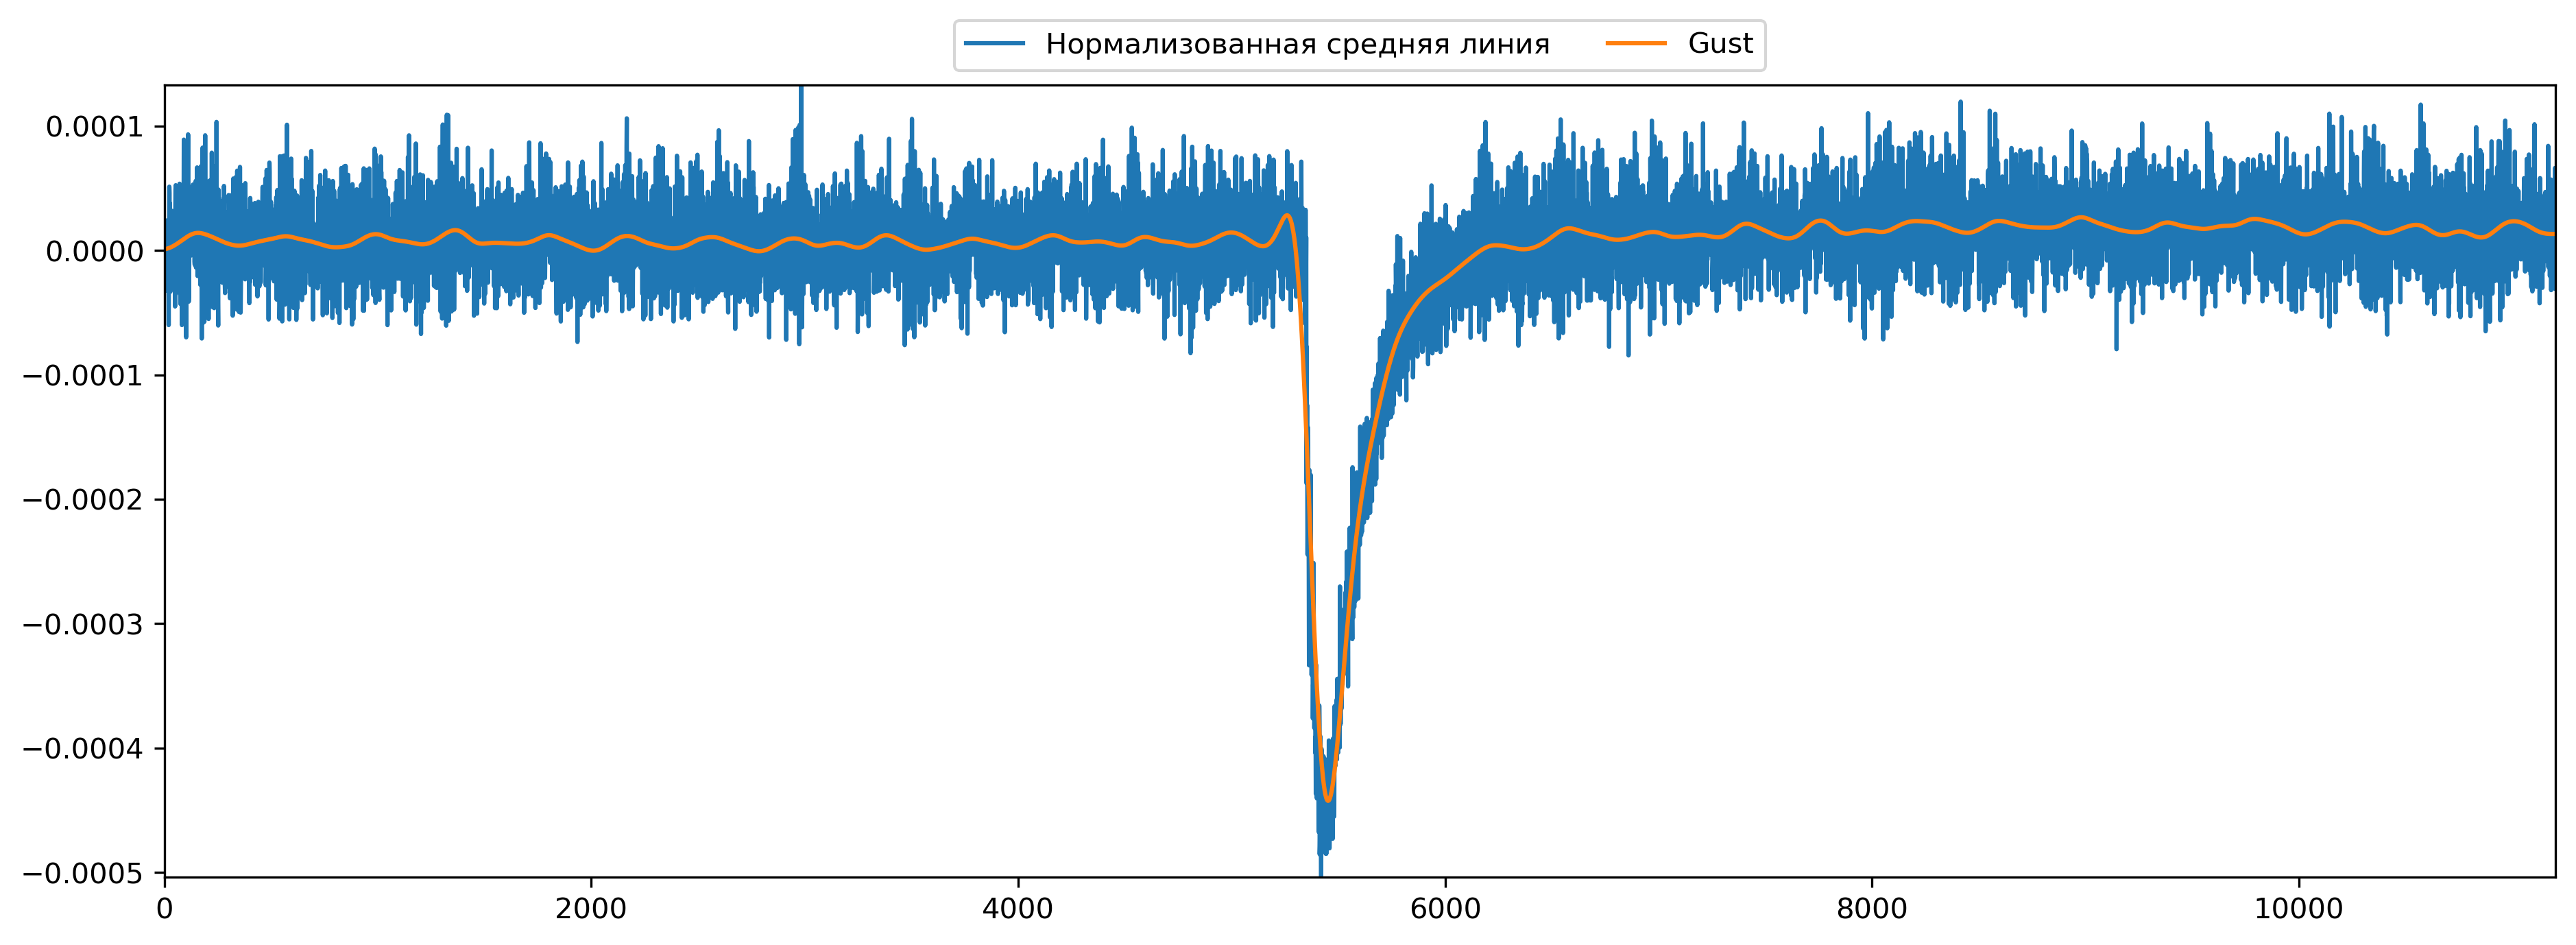

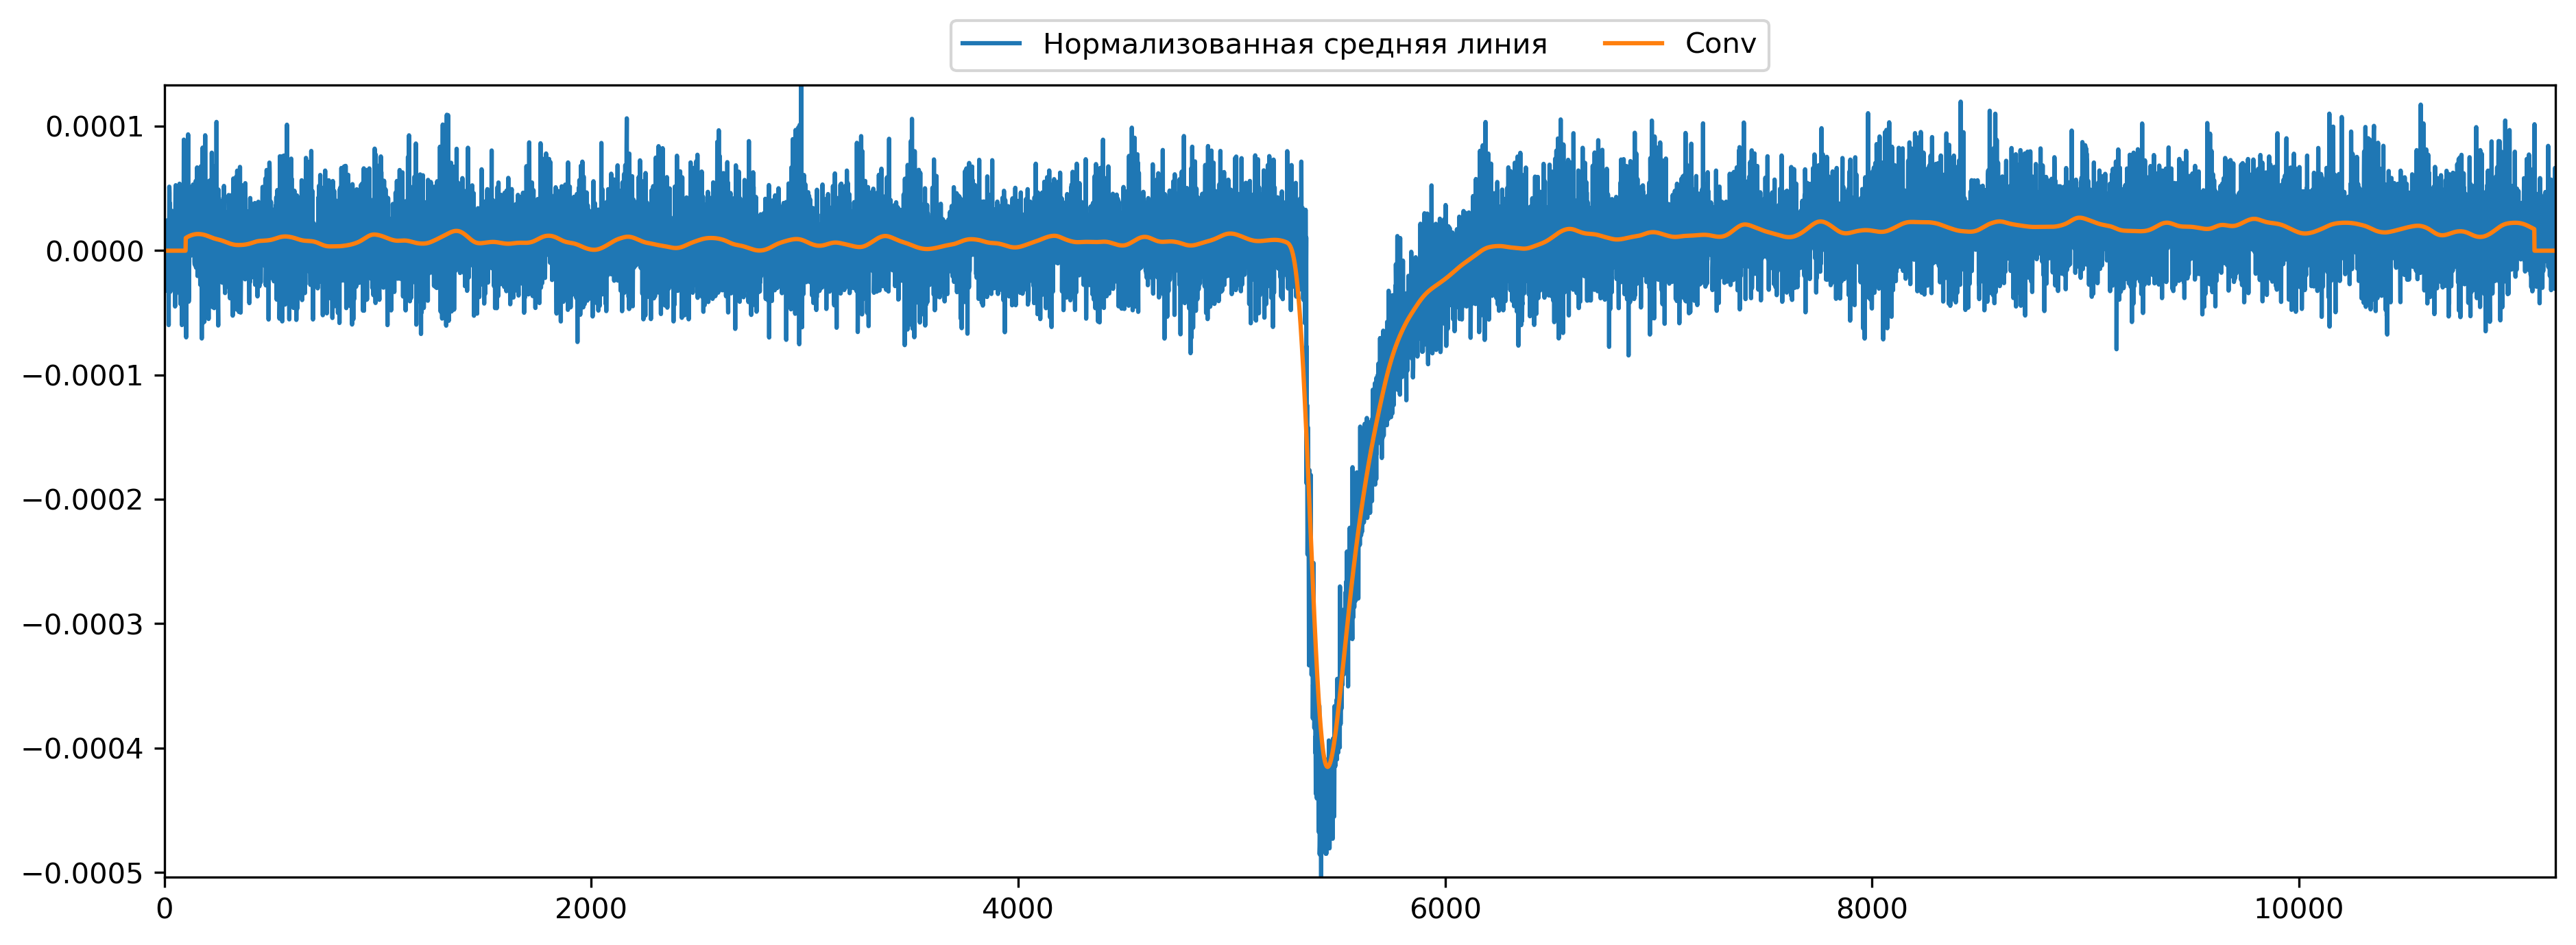

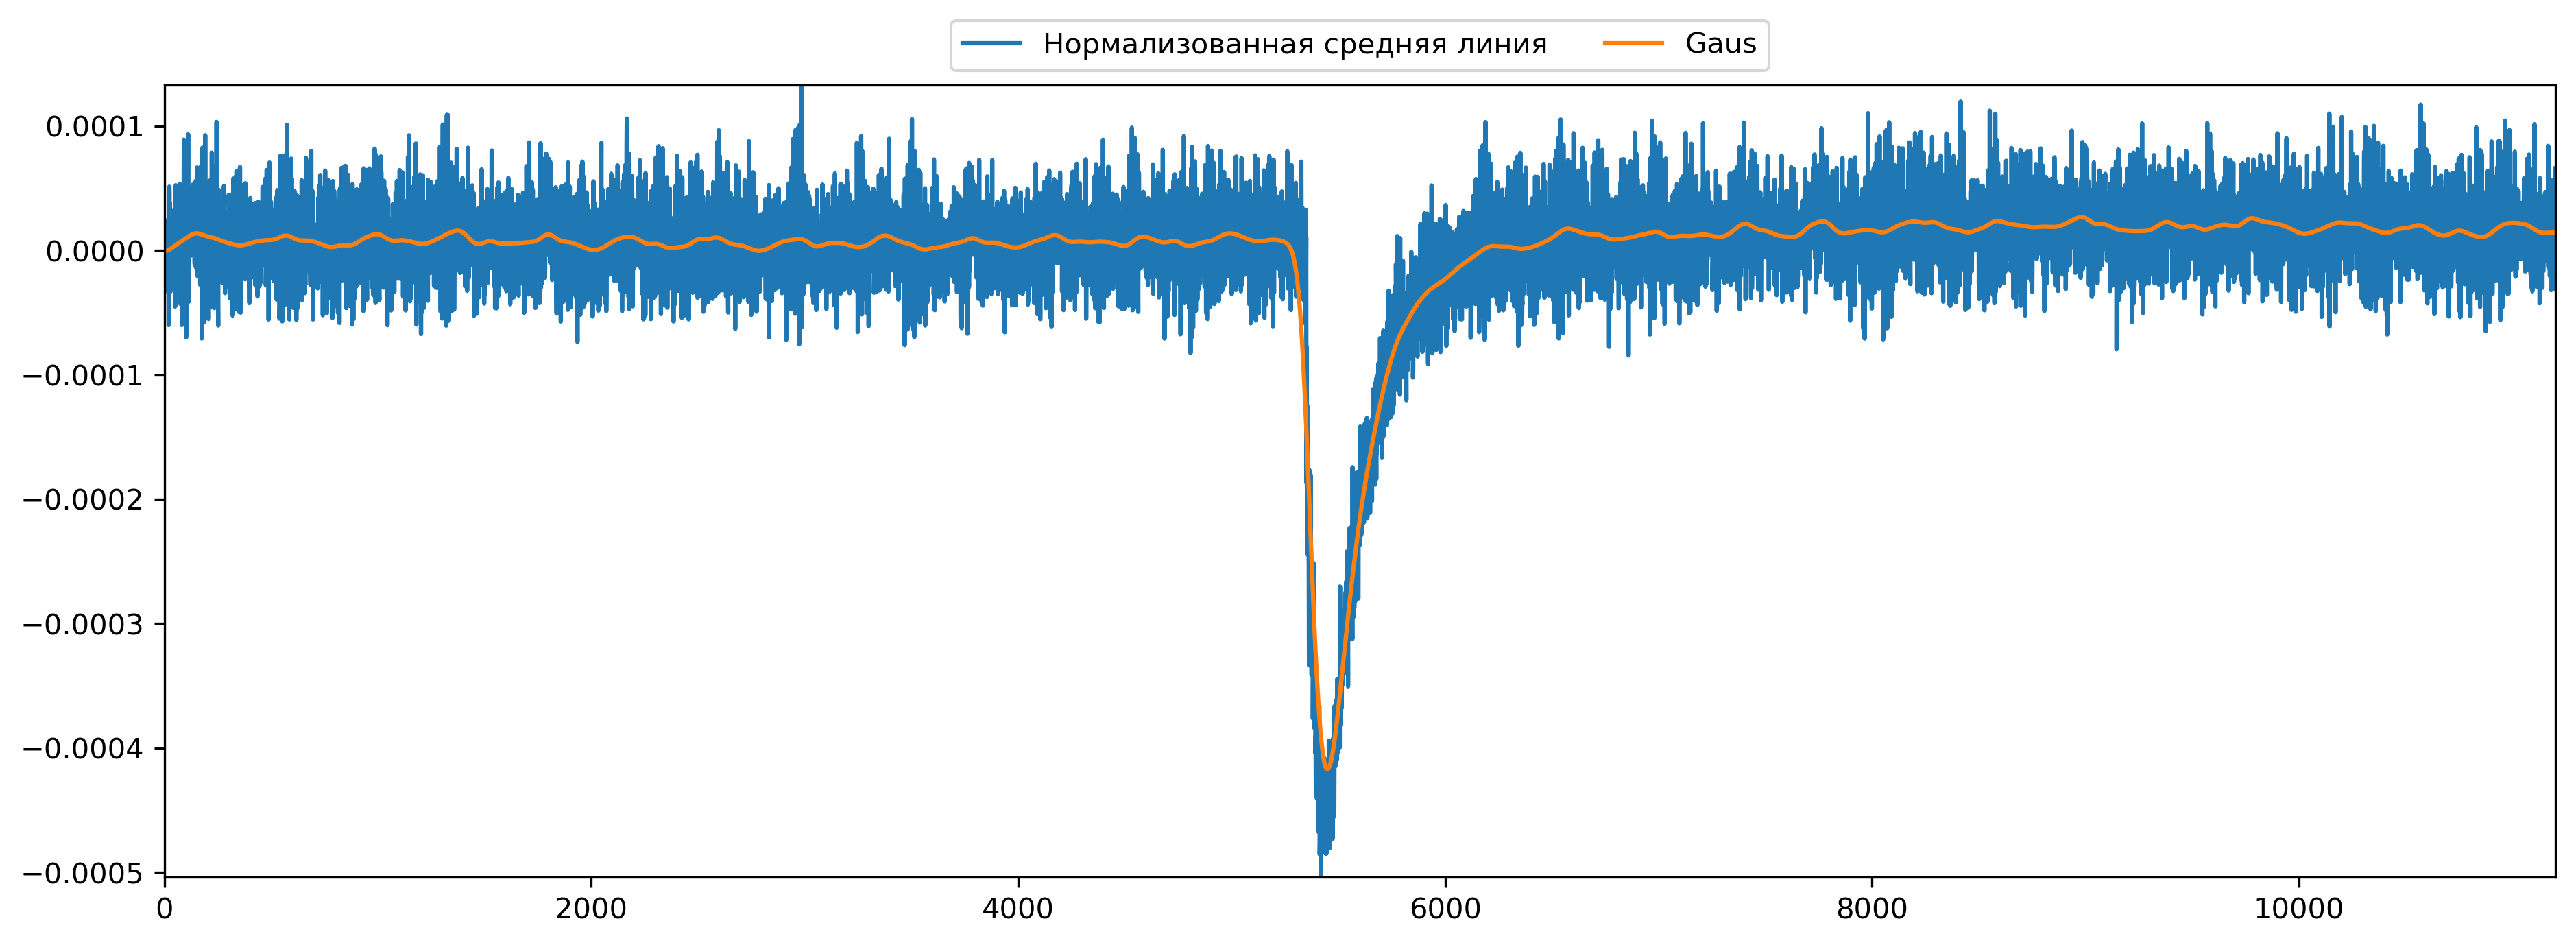

In [15]:
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1100), np.max(normMeanLine1100)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1100, label="Нормализованная средняя линия") 
plt.plot(filtered1, label="ДПФ 48") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1100), np.max(normMeanLine1100)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1100, label="Нормализованная средняя линия") 
plt.plot(filtered2, label="ДПФ 75") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1100), np.max(normMeanLine1100)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1100, label="Нормализованная средняя линия") 
plt.plot(filtered3, label="Gust") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1100), np.max(normMeanLine1100)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1100, label="Нормализованная средняя линия") 
plt.plot(filtered5, label="Conv")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  


plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1100), np.max(normMeanLine1100)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1100, label="Нормализованная средняя линия") 
plt.plot(filtered6, label="Gaus")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [16]:
wa1_list = [wa1100, wa1200, wa1300, wa1400, wa1500, wa11000]
wa3_list = [wa3100, wa3200, wa3300, wa3400, wa3500, wa31000]

for i in range(len(wa1_list)):
    wa1_list[i] = wa1_list[i] - np.expand_dims(wa1_list[i].mean(axis=1), axis=-1)
    wa3_list[i] = wa3_list[i] - np.expand_dims(wa3_list[i].mean(axis=1), axis=-1)    

In [17]:
n_std = 4

In [18]:
good_recs_wa1 = []
good_recs_wa3 = []

good_inds_wa1 = []
good_inds_wa3 = []

for i in range(len(wa1_list)):
    good_recs_wa1.append(np.array([rec for rec in wa1_list[i] if 5200 < np.argmin(rec) < 5500 
                             and min(rec) < rec.mean() - n_std * rec.std()]))
    good_recs_wa3.append(np.array([rec for rec in wa3_list[i] if 5200 < np.argmin(rec) < 5500 
                             and min(rec) < rec.mean() - n_std * rec.std() and max(rec) < rec.mean() + n_std * rec.std()]))  
    
    good_inds_wa1.append([ j for j in range(len(wa1_list[i])) if 5200 < np.argmin(wa1_list[i][j]) < 5500 
                             and min(wa1_list[i][j]) < wa1_list[i][j].mean() - n_std * wa1_list[i][j].std()])
    good_inds_wa3.append([ j for j in range(len(wa3_list[i])) if 5200 < np.argmin(wa3_list[i][j]) < 5500 
                             and min(wa3_list[i][j]) < wa3_list[i][j].mean() - n_std * wa3_list[i][j].std() 
                             and max(wa3_list[i][j]) < wa3_list[i][j].mean() + n_std * wa3_list[i][j].std()])

In [19]:
connections = {"intersec": [], "wa3":[], "wa1": []}
for i in range(len(wa1_list)):
    connections["intersec"].append(len(np.intersect1d(good_inds_wa1[i], good_inds_wa3[i])))
    connections["wa3"].append(len(good_inds_wa3[i]))
    connections["wa1"].append(len(good_inds_wa1[i]))                              

In [20]:
connections

{'intersec': [2, 1, 5, 5, 6, 5],
 'wa3': [4, 6, 9, 7, 7, 7],
 'wa1': [24, 33, 37, 44, 42, 43]}

In [21]:
b, a = scipy.signal.butter(3, 0.1)
filtered1 = []
for i in range(len(good_recs_wa3[0])):
    filtered1.append(scipy.signal.filtfilt(b, a, good_recs_wa3[0][i], method="gust"))

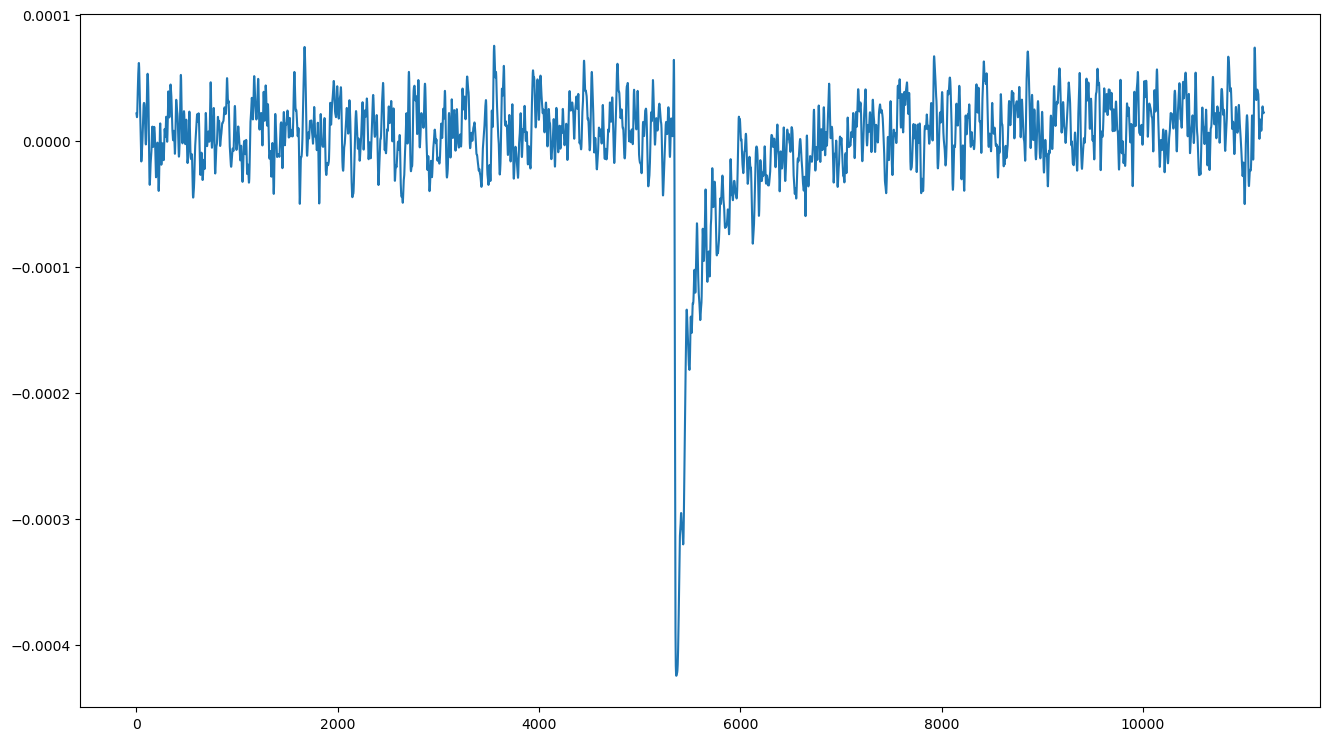

In [22]:
fig = plt.figure(figsize=(16, 9))
plt.plot(np.array(filtered1).mean(axis=0))

In [11]:
"""

SyntaxError: unterminated triple-quoted string literal (detected at line 1) (969763094.py, line 1)

In [ ]:
fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA1 100', fontsize=14)
plt.ylim([np.min(normca1100), np.max(normca1100)])
plt.xlim([0, maxlen])
#plt.xlim(5200,5250)
for rec in normca1100:
    plt.plot(rec)  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1100), np.max(normMeanLine1100)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1100, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA3 100', fontsize=14)
plt.ylim([np.min(normca3100), np.max(normca3100)])
plt.xlim([0, maxlen])
for rec in normca3100:
    plt.plot(rec) 
plt.show() 
 
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine3100), np.max(normMeanLine3100)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine3100, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA1 200', fontsize=14)
plt.ylim([np.min(normca1200), np.max(normca1200)])
plt.xlim([0, maxlen])
#plt.xlim(5200,5250)
for rec in normca1200:
    plt.plot(rec) 
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine1200), np.max(meanLine1200)])
plt.xlim([0, maxlen])
plt.plot(meanLine1200, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1200), np.max(normMeanLine1200)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1200, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA3 200', fontsize=14)
plt.ylim([np.min(normca3200), np.max(normca3200)])
plt.xlim([0, maxlen])
for rec in normca3200:
    plt.plot(rec) 
plt.show() 

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine3200), np.max(meanLine3200)])
plt.xlim([0, maxlen])
plt.plot(meanLine3200, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine3200), np.max(normMeanLine3200)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine3200, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA1 300', fontsize=14)
plt.ylim([np.min(normca1300), np.max(normca1300)])
plt.xlim([0, maxlen])
#plt.xlim(5300,5250)
for rec in normca1300:
    plt.plot(rec) 
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine1300), np.max(meanLine1300)])
plt.xlim([0, maxlen])
plt.plot(meanLine1300, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1300), np.max(normMeanLine1300)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1300, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA3 300', fontsize=14)
plt.ylim([np.min(normca3300), np.max(normca3300)])
plt.xlim([0, maxlen])
for rec in normca3300:
    plt.plot(rec) 
plt.show() 

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine3300), np.max(meanLine3300)])
plt.xlim([0, maxlen])
plt.plot(meanLine3300, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine3300), np.max(normMeanLine3300)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine3300, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA1 400', fontsize=14)
plt.ylim([np.min(normca1400), np.max(normca1400)])
plt.xlim([0, maxlen])
#plt.xlim(5400,5250)
for rec in normca1400:
    plt.plot(rec) 
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine1400), np.max(meanLine1400)])
plt.xlim([0, maxlen])
plt.plot(meanLine1400, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1400), np.max(normMeanLine1400)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1400, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA3 400', fontsize=14)
plt.ylim([np.min(normca3400), np.max(normca3400)])
plt.xlim([0, maxlen])
for rec in normca3400:
    plt.plot(rec) 
plt.show() 

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine3400), np.max(meanLine3400)])
plt.xlim([0, maxlen])
plt.plot(meanLine3400, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine3400), np.max(normMeanLine3400)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine3400, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA1 500', fontsize=14)
plt.ylim([np.min(normca1500), np.max(normca1500)])
plt.xlim([0, maxlen])
#plt.xlim(5500,5250)
for rec in normca1500:
    plt.plot(rec) 
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine1500), np.max(meanLine1500)])
plt.xlim([0, maxlen])
plt.plot(meanLine1500, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine1500), np.max(normMeanLine1500)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine1500, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA3 500', fontsize=14)
plt.ylim([np.min(normca3500), np.max(normca3500)])
plt.xlim([0, maxlen])
for rec in normca3500:
    plt.plot(rec) 
plt.show() 

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine3500), np.max(meanLine3500)])
plt.xlim([0, maxlen])
plt.plot(meanLine3500, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine3500), np.max(normMeanLine3500)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine3500, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA1 1000', fontsize=14)
plt.ylim([np.min(normca11000), np.max(normca11000)])
plt.xlim([0, maxlen])
#plt.xlim(51000,5250)
for rec in normca11000:
    plt.plot(rec) 
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine11000), np.max(meanLine11000)])
plt.xlim([0, maxlen])
plt.plot(meanLine11000, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine11000), np.max(normMeanLine11000)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine11000, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

fig = plt.figure(dpi=300, figsize=(15, 5))
fig.suptitle('Все 52 записи CA3 1000', fontsize=14)
plt.ylim([np.min(normca31000), np.max(normca31000)])
plt.xlim([0, maxlen])
for rec in normca31000:
    plt.plot(rec) 
plt.show() 

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(meanLine31000), np.max(meanLine31000)])
plt.xlim([0, maxlen])
plt.plot(meanLine31000, label="Средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(normMeanLine31000), np.max(normMeanLine31000)])
plt.xlim([0, maxlen])
plt.plot(normMeanLine31000, label="Нормализованная средняя линия") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
"""

In [ ]:
"""
number = 0
left = 0
right = len(wa1100[number])
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(wa1100[number][left:right]), np.max(wa1100[number][left:right])])
plt.xlim([left, right])
plt.plot(wa1100[number], label="Without artifact") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(ca1100[number][left:right]), np.max(ca1100[number][left:right])])
plt.xlim([left, right])
plt.plot(ca1100[number], label="With artifact") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
"""

In [ ]:
"""
number = 0
left = 0
right = maxlen
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(wa3100[number][left:right]), np.max(wa3100[number][left:right])])
plt.xlim([left, right])
plt.plot(wa3100[number], label="Without artifact") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(ca3100[number][left:right]), np.max(ca3100[number][left:right])])
plt.xlim([left, right])
plt.plot(ca3100[number], label="With artifact") 
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
"""

In [ ]:
"""

In [ ]:
"""
for i, record in enumerate(records):
    for key in record.keys(): 
        if 'Trace_1_9_1_3' in key:
            print(i)
"""

In [ ]:
"""
f, t, Sxx = scipy.signal.spectrogram(signal, 20000)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim(2750, 3500)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
"""

In [ ]:
number = 0
trace = h1[number]
signal = trace[:,1]
time = trace[:,0]

In [ ]:
b, a = scipy.signal.butter(3, 0.1)
filtered1 = scipy.signal.filtfilt(b, a, signal, method="gust")

In [ ]:
b, a = scipy.signal.iirfilter(4, Wn=7, fs=50, btype="low", ftype="butter")
filtered2 = scipy.signal.lfilter(b, a, signal)

In [ ]:
windowSize = 20
window = np.hanning(windowSize)
window = window / window.sum()
filteredSignal = np.convolve(window, signal, mode='valid')
filtered3 = [np.mean(filteredSignal) for s in signal]
startIndex = int(windowSize/2)
for i in range(startIndex, startIndex+len(filteredSignal)):
    filtered3[i]=filteredSignal[i-startIndex]

In [ ]:
filtered4 = gaussian_filter(signal, 2)

In [ ]:
filtered4 = gaussian_filter(signal, 2)
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(signal), np.max(signal)])
plt.xlim([np.min(time), np.max(time)])
plt.xlim([0.255, 0.2675])
plt.plot(time,signal, label="Средняя линия") 
#plt.plot(time,filtered1, label="Gust") 
#plt.plot(time,filtered2, label="LFilt")
#plt.plot(time,filtered3, label="Conv")
plt.plot(time,filtered4, label="Gaus")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  

In [ ]:
number = 0
trace = h1[number]
signal = trace[:,1]
time = trace[:,0]
gaus = gaussian_filter(signal, 10)

baseline = baseline_als(signal, 10000, 0.05)
baseline2 = baseline_arPLS(signal)

signal = gaus

s = gaus.copy()
startAnswer = 0
for i in range(10):
    startAnswer = np.argmax(s)
    s[np.argmax(s)] = np.mean(baseline)
    if np.abs(np.argmax(s)-np.argmax(baseline))>10:
        break
s = signal[startAnswer:]

median = np.median(signal)
minS = np.min(s)
maxS = np.max(s)

start = 0
if np.abs(minS-median)>np.abs(maxS-median):
    print("MIN")
    end = np.argmin(s)
    while end<len(s)-1 and (s[end]<median):
        end = end+1
    """
    start = np.argmin(s)
    while start>0 and (s[start]<median):
        start = start-1
    """
else:
    print("MAX")
    end = np.argmax(s)
    while end<len(s)-1 and (s[end]>median):
        end = end+1
    """
    start = np.argmax(s)
    while start>0 and (s[start]>median):
        start = start-1
    """
answer = s[start:end+1]      

startAnswer = startAnswer + start
endAnswer = startAnswer+len(answer)

timeAnswer = time[startAnswer:endAnswer]
gausAnswer = gaussian_filter(answer, 2)

answer = trace[:,1][startAnswer:endAnswer]    
signal = trace[:,1]
base = baseline2[startAnswer:endAnswer]

plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(signal), np.max(signal)])
plt.xlim([np.min(time), np.max(time)])
#plt.xlim([0.25, 0.275])
plt.plot(time,signal, label="Средняя линия") 
plt.plot(time,gaus, label="Gaus")
plt.plot(time,[np.mean(signal) for s in signal], label="Mean")
plt.plot(time,[np.median(signal) for s in signal], label="Median")
plt.plot(time,baseline, label="Baseline")
plt.plot(time,baseline2, label="Baseline2")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show()  
plt.figure(dpi=300, figsize=(15, 5))
plt.ylim([np.min(answer), np.max(answer)])
plt.xlim([np.min(timeAnswer), np.max(timeAnswer)])
plt.plot(timeAnswer,answer, label="Средняя линия") 
plt.plot(timeAnswer,gausAnswer, label="Gaus")
plt.plot(timeAnswer,[np.mean(signal) for s in answer], label="Mean")
plt.plot(timeAnswer,[np.median(signal) for s in answer], label="Median")
plt.plot(timeAnswer,base, label="Baseline")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],ncol=10)
plt.show() 
print(len(answer))